# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
#Type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
import kagglehub
import os

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
# 1. Download dataset
path = kagglehub.dataset_download("sebastianwillmann/beverage-sales")
print("📁 Path to dataset files:", path)

# 2. Gabungkan dengan nama file CSV yang sesuai
csv_path = os.path.join(path, "synthetic_beverage_sales_data.csv")  # Pastikan nama file sesuai

# 3. Muat dataset ke dalam DataFrame
df = pd.read_csv(csv_path)

# 4. Tampilkan informasi dasar dataset
print("✅ Dataset berhasil dimuat!")
print("Jumlah baris dan kolom:", df.shape)

print("\n📄 5 baris pertama:")
print(df.head())

📁 Path to dataset files: /kaggle/input/beverage-sales
✅ Dataset berhasil dimuat!
Jumlah baris dan kolom: (8999910, 11)

📄 5 baris pertama:
  Order_ID Customer_ID Customer_Type             Product     Category  \
0     ORD1     CUS1496           B2B          Vio Wasser        Water   
1     ORD1     CUS1496           B2B               Evian        Water   
2     ORD1     CUS1496           B2B              Sprite  Soft Drinks   
3     ORD1     CUS1496           B2B  Rauch Multivitamin       Juices   
4     ORD1     CUS1496           B2B        Gerolsteiner        Water   

   Unit_Price  Quantity  Discount  Total_Price             Region  Order_Date  
0        1.66        53      0.10        79.18  Baden-Württemberg  2023-08-23  
1        1.56        90      0.10       126.36  Baden-Württemberg  2023-08-23  
2        1.17        73      0.05        81.14  Baden-Württemberg  2023-08-23  
3        3.22        59      0.10       170.98  Baden-Württemberg  2023-08-23  
4        0.87        3

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

📏 Jumlah baris dan kolom: (8999910, 11)

🔢 Tipe data setiap kolom:
 Order_ID          object
Customer_ID       object
Customer_Type     object
Product           object
Category          object
Unit_Price       float64
Quantity           int64
Discount         float64
Total_Price      float64
Region            object
Order_Date        object
dtype: object

✅ Tidak ada missing values.

📊 Statistik deskriptif fitur numerik:
          Unit_Price      Quantity      Discount   Total_Price
count  8.999910e+06  8.999910e+06  8.999910e+06  8.999910e+06
mean   5.818037e+00  2.313813e+01  2.972879e-02  1.307437e+02
std    1.470050e+01  2.689321e+01  4.479841e-02  5.096947e+02
min    3.200000e-01  1.000000e+00  0.000000e+00  3.000000e-01
25%    1.050000e+00  6.000000e+00  0.000000e+00  8.400000e+00
50%    1.750000e+00  1.100000e+01  0.000000e+00  2.114000e+01
75%    3.210000e+00  3.000000e+01  5.000000e-02  6.949000e+01
max    1.695300e+02  1.000000e+02  1.500000e-01  1.429530e+04


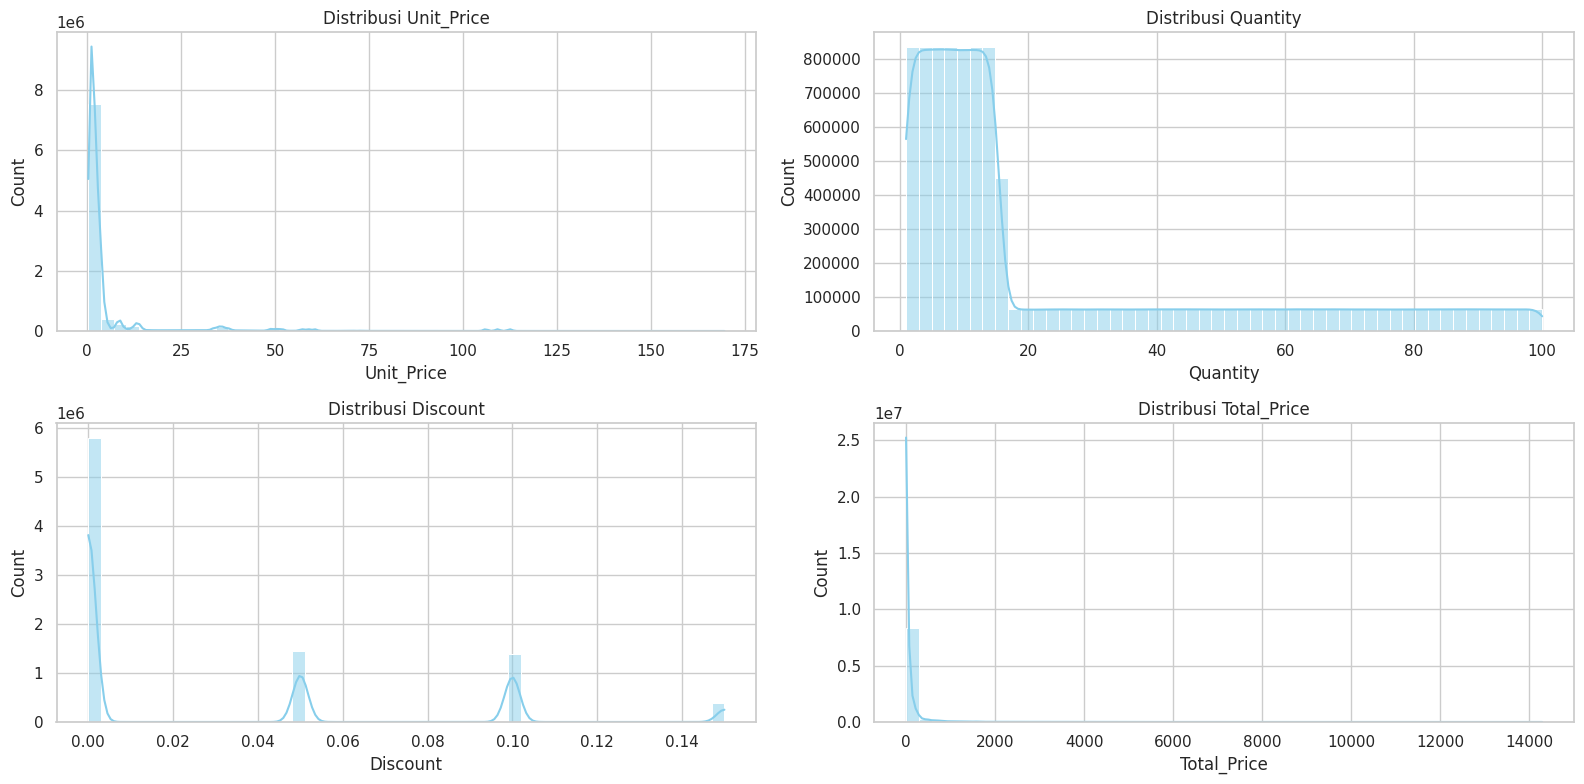

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


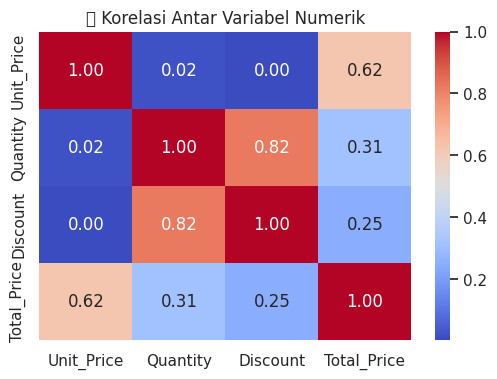

<ipython-input-3-bd26cda2d51f>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')
<ipython-input-3-bd26cda2d51f>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')
<ipython-input-3-bd26cda2d51f>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


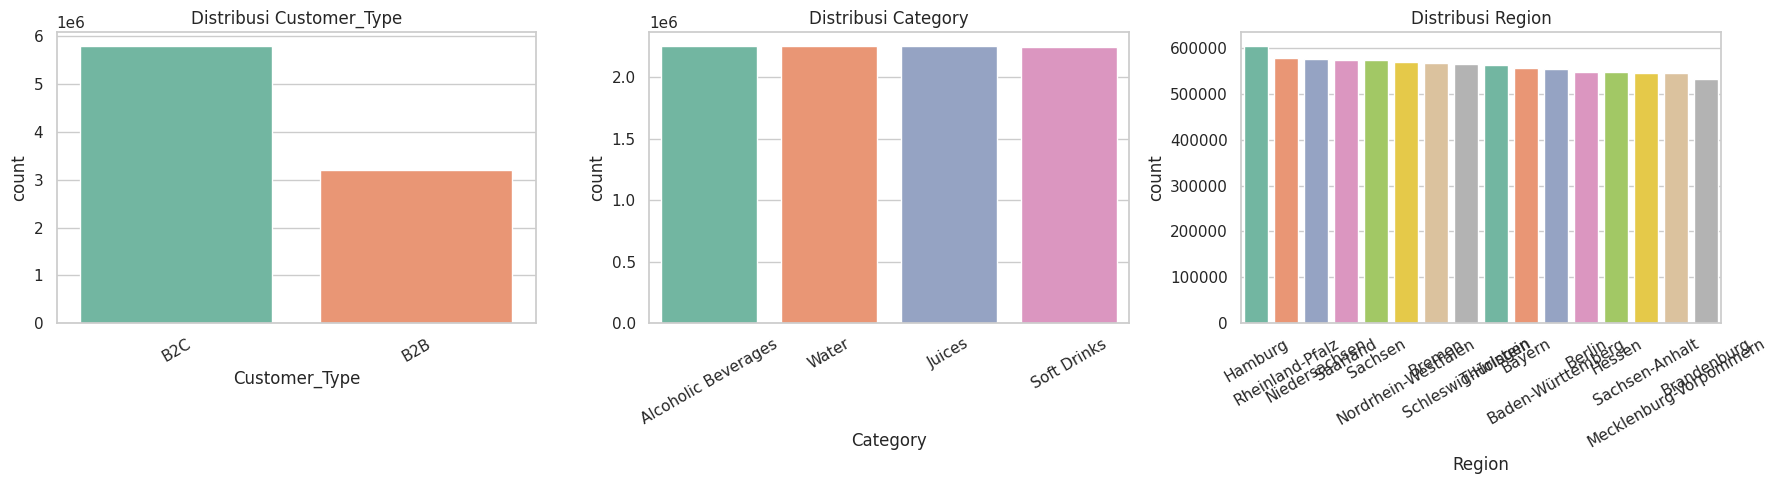

In [3]:
# 4. Exploratory Data Analysis (EDA)

# 1. Struktur Data
print("📏 Jumlah baris dan kolom:", df.shape)
print("\n🔢 Tipe data setiap kolom:\n", df.dtypes)

# 2. Cek Missing Values
missing = df.isnull().sum()
missing = missing[missing > 0]
if missing.empty:
    print("\n✅ Tidak ada missing values.")
else:
    print("\n🔍 Jumlah missing values per kolom:\n", missing)

# 3. Statistik Deskriptif
print("\n📊 Statistik deskriptif fitur numerik:\n", df.describe())

# 4. Visualisasi Distribusi Fitur Numerik
sns.set(style="whitegrid")
num_cols = ['Unit_Price', 'Quantity', 'Discount', 'Total_Price']

plt.figure(figsize=(16, 8))
for i, col in enumerate(num_cols):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], bins=50, kde=True, color='skyblue')
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

# 5. Korelasi Antar Variabel Numerik
plt.figure(figsize=(6, 4))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("📈 Korelasi Antar Variabel Numerik")
plt.show()

# 6. Distribusi Fitur Kategorikal
cat_cols = ['Customer_Type', 'Category', 'Region']

plt.figure(figsize=(18, 5))
for i, col in enumerate(cat_cols):
    plt.subplot(1, 3, i + 1)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')
    plt.title(f'Distribusi {col}')
    plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [4]:
# 5. Data Preprocessing

# 1. Cek dan Tangani Missing Values
print("🔍 Missing values:\n", df.isnull().sum())
# Jika tidak ada missing values, lanjutkan. Kalau ada, bisa diimputasi atau di-drop sesuai konteks.

# 2. Hapus Duplikat
print("📌 Jumlah duplikat:", df.duplicated().sum())
df = df.drop_duplicates()

# 3. Buat Fitur Baru (Opsional): Price per Unit
df['Price_per_Unit'] = df['Total_Price'] / df['Quantity']

# 4. Normalisasi Fitur Numerik
from sklearn.preprocessing import StandardScaler

num_cols = ['Unit_Price', 'Quantity', 'Discount', 'Total_Price', 'Price_per_Unit']
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[num_cols] = scaler.fit_transform(df_scaled[num_cols])

# 5. Deteksi dan Hapus Outlier dengan IQR
import numpy as np

def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

df_clean = remove_outliers_iqr(df_scaled, num_cols)

# 6. Encoding Kategorikal
df_encoded = pd.get_dummies(df_clean, columns=['Customer_Type', 'Region', 'Category'], drop_first=True)

# 7. Binning (Diskretisasi) untuk Diskon
df_encoded['Discount_Level'] = pd.cut(
    df_encoded['Discount'],
    bins=[-np.inf, -0.5, 0, 0.5, np.inf],
    labels=['High Negative', 'No Discount', 'Low Discount', 'High Discount']
)

# One-hot encoding hasil binning
df_encoded = pd.get_dummies(df_encoded, columns=['Discount_Level'], drop_first=True)

# 8. Cek hasil akhir preprocessing
print("✅ Data siap digunakan untuk modeling!")
print("Ukuran data akhir:", df_encoded.shape)
print(df_encoded.head())

# Drop kolom non-numerik yang tidak dibutuhkan dalam clustering
non_numeric_cols = ['Order_ID', 'Customer_ID', 'Order_Date', 'Product']  # tambahkan 'Product' yang masih object

# Drop kolom-kolom tersebut dari df_encoded
X = df_encoded.drop(columns=non_numeric_cols + ['Cluster'], errors='ignore')

🔍 Missing values:
 Order_ID         0
Customer_ID      0
Customer_Type    0
Product          0
Category         0
Unit_Price       0
Quantity         0
Discount         0
Total_Price      0
Region           0
Order_Date       0
dtype: int64
📌 Jumlah duplikat: 0
✅ Data siap digunakan untuk modeling!
Ukuran data akhir: (6132583, 31)
   Order_ID Customer_ID         Product  Unit_Price  Quantity  Discount  \
4      ORD1     CUS1496    Gerolsteiner   -0.336590  0.441073  1.568610   
7      ORD3     CUS1806          Vittel   -0.366521 -0.376978  0.452499   
9      ORD3     CUS1806           Evian   -0.301897 -0.748819  0.452499   
10     ORD4     CUS2275    Mountain Dew   -0.328427 -0.451346 -0.663613   
11     ORD5     CUS7919  Hohes C Orange   -0.292374 -0.562898  0.452499   

    Total_Price  Order_Date  Price_per_Unit  Customer_Type_B2C  ...  \
4     -0.202756  2023-08-23       -0.339141              False  ...   
7     -0.246096  2022-11-20       -0.365267              False  ...   
9  

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [5]:
# 6. Pembangunan Model Clustering

# Pastikan hanya numerik
X = X.select_dtypes(include=['number'])

X_sample = X.sample(n=100000, random_state=42)

# 2. Ukuran data sample
print("📦 Ukuran data sample:", X_sample.shape)

# 3. Evaluasi jumlah cluster terbaik menggunakan Silhouette Score
silhouette_scores = []
range_k = range(2, 11)

for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_sample)
    score = silhouette_score(X_sample, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"K={k}, Silhouette Score={score:.4f}")


# 5. Latih model akhir KMeans dengan K terbaik (misal K=2)
best_k = 2
kmeans_final = KMeans(n_clusters=best_k, random_state=42)
df_encoded['Cluster'] = kmeans_final.fit_predict(X)


📦 Ukuran data sample: (100000, 5)
K=2, Silhouette Score=0.7697
K=3, Silhouette Score=0.4478
K=4, Silhouette Score=0.4674
K=5, Silhouette Score=0.4785
K=6, Silhouette Score=0.4898
K=7, Silhouette Score=0.4840
K=8, Silhouette Score=0.4463
K=9, Silhouette Score=0.4224
K=10, Silhouette Score=0.4185


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

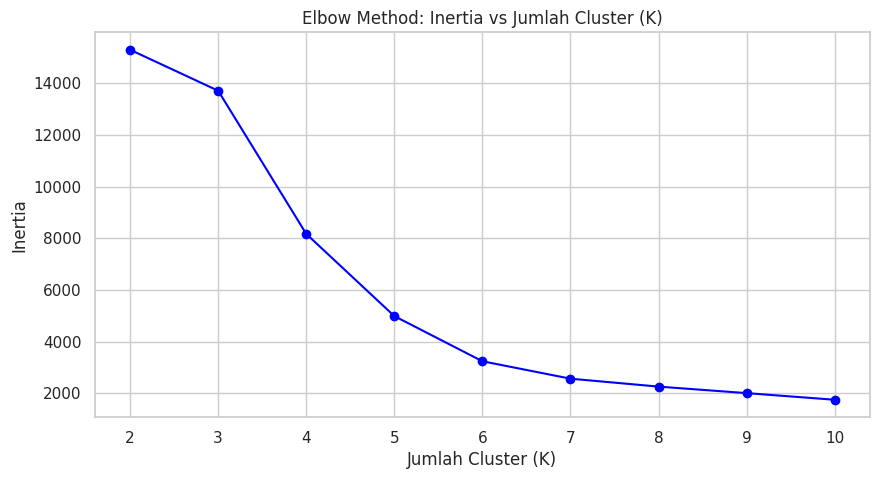

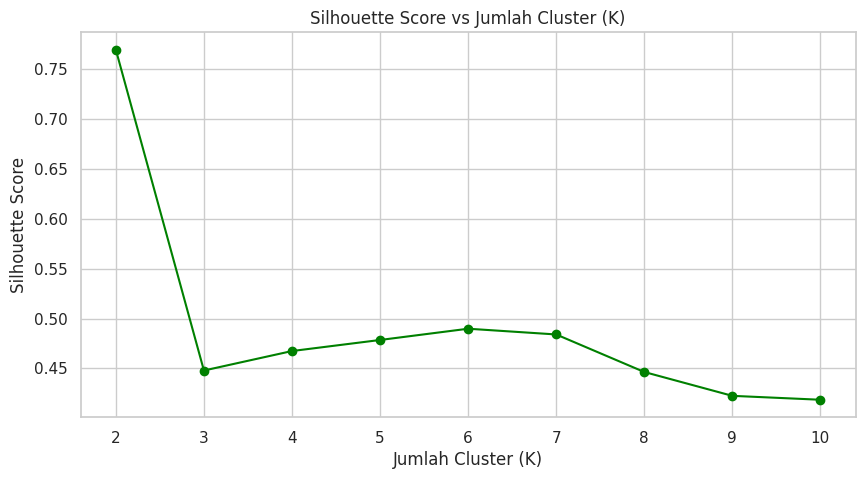

In [6]:
# Tentukan range K
range_k = range(2, 11)
silhouette_scores = []
inertia_values = []

# Cek Silhouette Score & Inertia untuk masing-masing K
for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_sample)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_sample, kmeans.labels_))


# Visualisasi Elbow Method (Inertia)
plt.figure(figsize=(10, 5))
plt.plot(range_k, inertia_values, marker='o', color='blue')
plt.title("Elbow Method: Inertia vs Jumlah Cluster (K)")
plt.xlabel("Jumlah Cluster (K)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# Visualisasi Silhouette Score
plt.figure(figsize=(10, 5))
plt.plot(range_k, silhouette_scores, marker='o', color='green')
plt.title("Silhouette Score vs Jumlah Cluster (K)")
plt.xlabel("Jumlah Cluster (K)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
#Type your code here


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

<ipython-input-7-280fedca28fc>:17: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


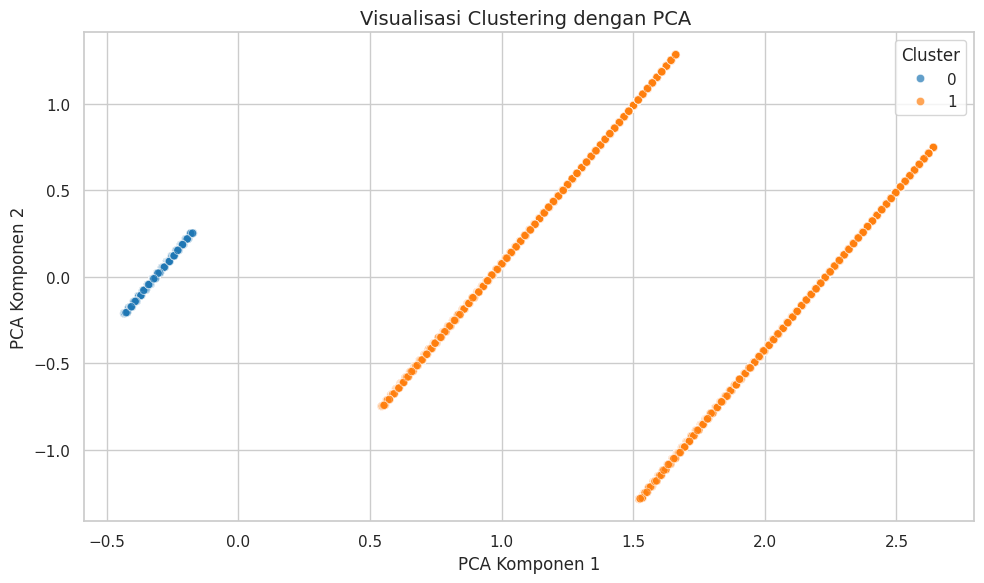

In [7]:
# Lakukan PCA untuk reduksi ke 2 dimensi
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

# Buat DataFrame untuk hasil PCA + label cluster
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = kmeans_final.labels_

# Plot visualisasi clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Cluster', palette='tab10', alpha=0.7)
plt.title('Visualisasi Clustering dengan PCA ', fontsize=14)
plt.xlabel('PCA Komponen 1')
plt.ylabel('PCA Komponen 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [8]:
# Tambahkan label cluster ke data hasil encoded
df_encoded_clustered = df_encoded.copy()
df_encoded_clustered['Cluster'] = kmeans_final.labels_

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [9]:
# Inverse transform untuk fitur numerik
df_original_numerik = pd.DataFrame(
    scaler.inverse_transform(df_encoded_clustered[num_cols]),
    columns=num_cols
)

# Gabungkan kembali dengan kolom lain yang sudah tidak di-scale
df_result = pd.concat([
    df_original_numerik,
    df_encoded_clustered.drop(columns=num_cols)
], axis=1)

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [10]:
# Contoh analisis sederhana per cluster
df_result.groupby('Cluster')[['Unit_Price', 'Quantity', 'Price_per_Unit']].mean()

,Unit_Price,Quantity,Price_per_Unit
Cluster,,,
0.0,1.659919,11.357281,1.644779
1.0,1.659559,11.347667,1.644468


Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:



---

## ✅ **Analisis Karakteristik untuk Setiap Cluster dari Model KMeans**

### 🔹 Cluster 0 (0) – **Pelanggan Mid-Range Stabil**
- **Rata-rata Unit Price:** 1.659919
- **Rata-rata Quantity:** 11.357281  
- **Rata-rata Price per Unit:** 1.644779  
- **Analisis:**  
  Cluster ini mencerminkan **pembeli dengan preferensi harga yang relatif stabil**. Harga satuan produk berada pada level menengah, dan volume pembelian tergolong **konsisten dalam jumlah sedang**. Price per unit hampir sama dengan Unit Price, menunjukkan bahwa pelanggan **tidak terlalu terpengaruh oleh diskon**.

---

### 🔹 Cluster 1 (1) – **Segmen Serupa dengan Pola Konsumsi Konsisten**
- **Rata-rata Unit Price:** 1.659559  
- **Rata-rata Quantity:** 11.347667  
- **Rata-rata Price per Unit:** 1.644468  
- **Analisis:**  
  Karakteristik dari cluster ini **sangat mirip dengan Cluster 0**, dengan hanya sedikit perbedaan statistik. Ini menunjukkan bahwa pelanggan dalam cluster ini juga merupakan konsumen **mid-range yang cenderung konsisten**, serta tidak sensitif terhadap diskon.

---

## 🧠 **Kesimpulan Umum & Strategi Bisnis**
- Kedua cluster menandakan **segmen pasar utama yang relatif homogen**.
- Cocok untuk strategi seperti:
  - **Program loyalitas sederhana**
  - **Penawaran bundling**
  - **Promosi berkala**
- Meskipun tidak ada perbedaan mencolok, pengelompokan ini tetap dapat digunakan sebagai **dasar segmentasi awal**, terutama jika digabung dengan data tambahan seperti waktu pembelian, lokasi, atau kategori produk.

---


# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.



---

## 📊 **Analisis Karakteristik Cluster dari Model KMeans**

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans berdasarkan fitur numerik utama: `Unit_Price`, `Quantity`, dan `Price_per_Unit`.

---

### 🔹 **Cluster 0:**
- **Rata-rata Unit Price:** 1.6599  
- **Rata-rata Quantity:** 11.36  
- **Rata-rata Price per Unit:** 1.6448  

**Analisis:**  
Pelanggan dalam cluster ini membeli produk dengan harga satuan sedikit lebih tinggi dibanding rata-rata. Meskipun jumlah pembelian tidak terlalu besar, mereka cenderung konsisten dalam pola belanja. Karakteristik ini mencerminkan konsumen reguler yang **tidak terlalu bergantung pada diskon** dan memiliki **preferensi stabil terhadap produk tertentu**.

---

### 🔹 **Cluster 1:**
- **Rata-rata Unit Price:** 1.6596  
- **Rata-rata Quantity:** 11.35  
- **Rata-rata Price per Unit:** 1.6445  

**Analisis:**  
Cluster ini memiliki pola pembelian yang sangat mirip dengan cluster sebelumnya. Rata-rata harga dan volume pembelian hampir identik. Ini bisa menunjukkan bahwa secara keseluruhan konsumen dalam dataset ini memiliki **segmentasi yang cukup homogen**, atau **variabel clustering yang digunakan belum cukup membedakan antar segmen** secara signifikan.

---



# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [11]:
# Buat salinan data asli yang sudah dibersihkan (tanpa outlier)
df_clean_original = df.loc[df_encoded.index].copy()

# Tambahkan label cluster ke data asli yang sudah bersih
df_clean_original['Cluster_KMeans'] = df_encoded['Cluster'].values

# Simpan ke CSV
df_clean_original.to_csv('hasil_clustering_beverage.csv', index=False)

print("✅ Data hasil clustering berhasil disimpan ke 'hasil_clustering_beverage.csv'")

✅ Data hasil clustering berhasil disimpan ke 'hasil_clustering_beverage.csv'
